# CNN Classification - CIFAR-10
Run each cell in order from top to bottom.

In [ ]:
# Cell 1: All imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f"TensorFlow version: {tf.__version__}")
print("Imports done!")

In [2]:
# Cell 2: Load and normalize data (MUST RUN THIS!)
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

# NORMALIZE - divides pixel values by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"X_train max: {X_train.max()}")
print(f"X_train min: {X_train.min()}")
print("\nData loaded and normalized!")

X_train shape: (50000, 32, 32, 3)
X_train max: 1.0
X_train min: 0.0

Data loaded and normalized!


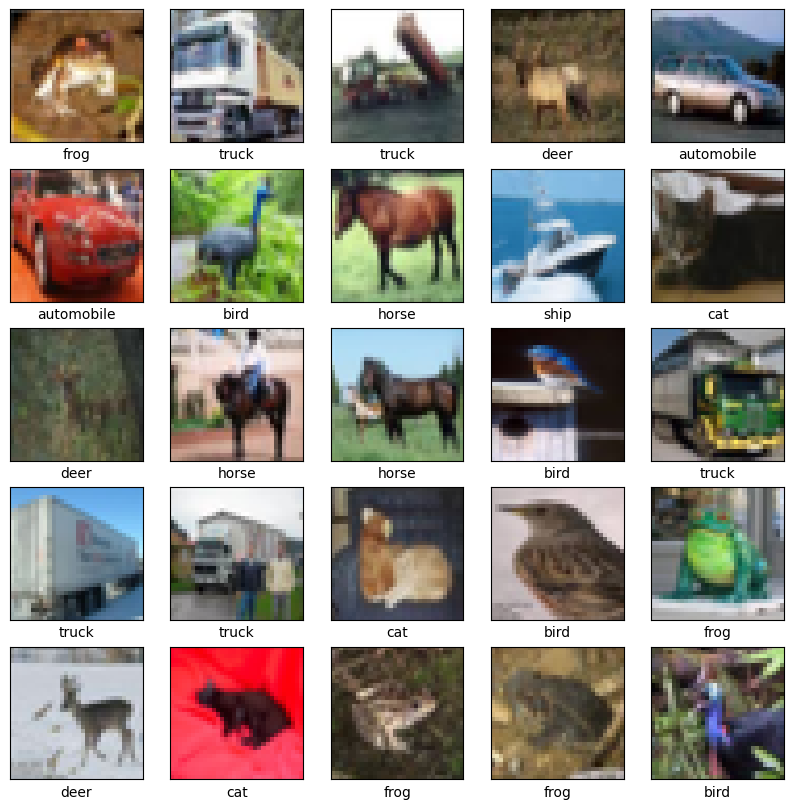

In [3]:
# Cell 3: Class names and visualize
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
# Cell 4: Build CNN model (with BatchNormalization to prevent gradient explosion)
model = keras.models.Sequential()

# First conv block
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))

# Second conv block
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))

# Third conv block (removed extra MaxPool to keep feature maps larger)
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())

# Dense layers with Dropout for regularization
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10))

print("Model built!")
model.summary()

Model built!


/Users/Antony/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,570 (666.29 KB)

 Trainable params: 170,250 (665.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [5]:
# Cell 5: Compile model (lower learning rate for stability)
lossF = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)  # Reduced from 0.001 to 0.0001
model.compile(optimizer=optim, loss=lossF, metrics=["accuracy"])
print("Model compiled with learning_rate=0.0001")

Model compiled with learning_rate=0.0001


In [6]:
# Cell 6: Train model
# Loss should stay around 1.0-2.0 and accuracy should INCREASE
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.3214 - loss: 1.8772 - val_accuracy: 0.4450 - val_loss: 1.5336
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.4593 - loss: 1.4840 - val_accuracy: 0.5262 - val_loss: 1.3064
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.5176 - loss: 1.3361 - val_accuracy: 0.5502 - val_loss: 1.2626
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5573 - loss: 1.2376 - val_accuracy: 0.5982 - val_loss: 1.1285
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.5843 - loss: 1.1601 - val_accuracy: 0.6244 - val_loss: 1.0864
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6086 - loss: 1.1014 - val_accuracy: 0.6278 - val_loss: 1.0378
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6236 - loss: 1.0559 - val_accuracy: 0.6340 - val_loss: 1.0315
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6413 - loss: 1.0100 - 

In [7]:
# Cell 7: Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7133 - loss: 0.8264

Test Accuracy: 71.33%


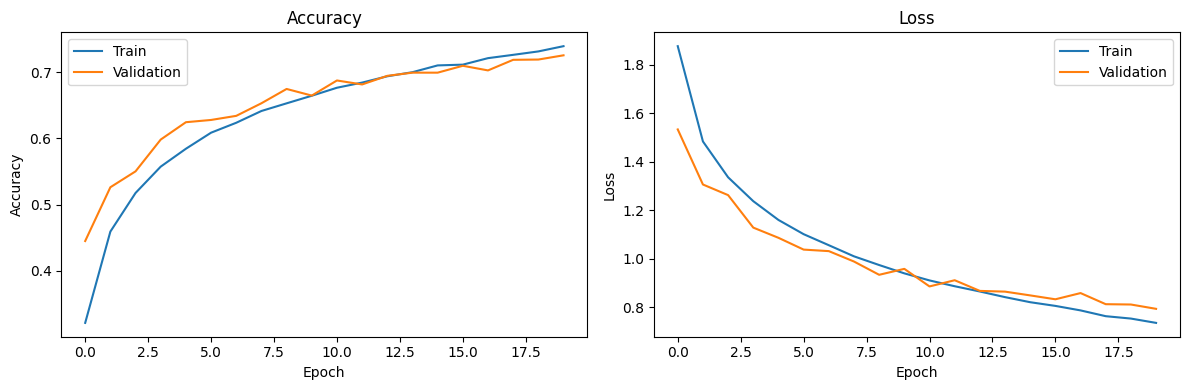

In [8]:
# Cell 8: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Prediction for first image:
Predicted: cat
Actual: cat


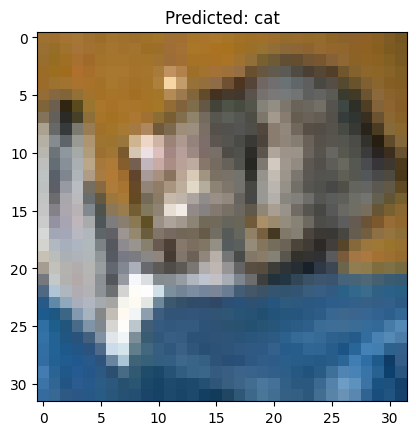

In [9]:
# Cell 9: Make predictions
import numpy as np
predictions = model.predict(X_test)

print("Prediction for first image:")
print(f"Predicted: {class_names[np.argmax(predictions[0])]}")
print(f"Actual: {class_names[y_test[0][0]]}")

plt.imshow(X_test[0])
plt.title(f"Predicted: {class_names[np.argmax(predictions[0])]}")
plt.show()